# Proyecto

## Importación de Gatos

In [36]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer el archivo master.csv
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [37]:
"""
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile
profile.to_file("profiler.html")
"""

'\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df)\nprofile\nprofile.to_file("profiler.html")\n'

In [38]:
# Debemos cambiar el nombre de ' gdp_for_year ($) ' a 'gdp_for_year' y 'gdp_per_capita ($)' a 'gdp_per_capita'
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Explore los datos para encontrar preguntas interesantes y líneas de investigación.

### a) Comience describiendo cuántas variables y observaciones tiene disponibles, y el tipo de cada una de las variables

In [39]:
# cuantas variables hay?
print(f"hay {len(df.columns)} y son las siguientes:")

list_columns = list(df.columns)
for each in list_columns:
    print(f"{each}  \t\t: {df[each].dtype}")


# crea un df llamado df_vars con las variables del df y un ejemplo de cada una
df_vars = pd.DataFrame()
for each in list_columns:
    df_vars[each] = [df[each].iloc[100]]

print(f"El df_vars tiene {len(df_vars.columns)} columnas y son las siguientes:")
df_vars.head()

hay 12 y son las siguientes:
country  		: object
year  		: int64
sex  		: object
age  		: object
suicides_no  		: int64
population  		: int64
suicides/100k pop  		: float64
country-year  		: object
HDI for year  		: float64
gdp_for_year  		: object
gdp_per_capita  		: int64
generation  		: object
El df_vars tiene 12 columnas y son las siguientes:


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1997,female,15-24 years,21,294000,7.14,Albania1997,NaN,"2,359,903,108",793,Generation X


En el conjunto de datos podemos encontrar 12 variables distintas, de las cuales 3 de tipo texto, 6 de tipo númerico, y 3 de tipo categórico. En el conjunto de datos se encontró que hay un total de 19456 de celdas vacias, lo que representa un 5.8% del total de datos; el conjunto de datos posee 27820 observaciones (filas), donde la columna HDI_for_year contiene la totalidad de estas celdas vacías, representando el 69.9% de los datos en dicha columna, por lo que no es viable eliminar las filas que no posean dicho dato, por esto se deberá evaluar un acercamiento correcto a este problema. Las columnas de número de suicidios y número de suicidios por cada 100k de población poseen ceros, sin embargo esto no es un problema ya que por la naturaleza de estas columnas es normal y factible que contengan datos de esta índole. La columna de sexo está uniformemente distribuida, por lo que se cuenta con la misma cantidad de datos tanto para hombres como para mujeres, lo cual es bastante bueno para un análisis sin sesgos. En cuanto a las edades que se encuentran en los datos, ya que se encuentran en una variable de tipo categórico, se cuenta con los intervalos de:
- 15-24
- 25-34
- 35-54
- 55-74
- 75 +

Estos rangos se cambiaran a variables de tipo númerico para poder separar cada uno de los rangos por columnas distintas. Lo mismo se hará para la variable sexo y para la generación, siendo esta ultima dividida en las categorías de:
- Generation X
- Silent
- Millenials
- Boomers
- G.I. Generation




| Variable          | Tipo de Variable       |
|-------------------|------------------------|
| country           | Cualitativa Nominal    |
| year              | Cuantitativa Discreta  |
| sex               | Cualitativa Nominal    |
| age               | Cualitativa Ordinal    |
| suicides_no       | Cuantitativa Discreta  |
| population        | Cuantitativa Discreta  |
| suicides/100k pop | Cuantitativa Continua  |
| country-year      | Cualitativa Nominal    |
| HDI for year      | Cuantitativa Continua  |
| gdp_for_year      | Cuantitativa Continua  |
| gdp_per_capita    | Cuantitativa Continua  |
| generation        | Cualitativa Ordinal    |


In [40]:
# Convertir gdp_for_year a float
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '').astype(float)

# convertir gdp_per_capita a float
df['gdp_per_capita'] = df['gdp_per_capita'].astype(float)

In [41]:
# en la columna age, debemos eliminar en todas las columnas ' years'. 
df['age'] = df['age'].str.replace(' years', '')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,Boomers


In [42]:
"""
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile
profile.to_file("profiler.html")
"""

'\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df)\nprofile\nprofile.to_file("profiler.html")\n'

In [43]:
# age dummies
age_dummies = pd.get_dummies(df['age'], prefix='age')
df = pd.concat([df, age_dummies], axis=1)
df.drop('age', axis=1, inplace=True)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,age_75+
0,Albania,1987,male,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,Generation X,True,False,False,False,False,False
1,Albania,1987,male,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,Silent,False,False,True,False,False,False
2,Albania,1987,female,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,Generation X,True,False,False,False,False,False
3,Albania,1987,male,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,G.I. Generation,False,False,False,False,False,True
4,Albania,1987,male,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,Boomers,False,True,False,False,False,False


In [44]:
# generation dummies
generation_dummies = pd.get_dummies(df['generation'], prefix='generation')
df = pd.concat([df, generation_dummies], axis=1)
df.drop('generation', axis=1, inplace=True)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,...,age_35-54,age_5-14,age_55-74,age_75+,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,male,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,False,False,True,False,False,False
1,Albania,1987,male,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,...,True,False,False,False,False,False,False,False,False,True
2,Albania,1987,female,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,False,False,True,False,False,False
3,Albania,1987,male,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,True,False,True,False,False,False,False
4,Albania,1987,male,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,True,False,False,False,False,False


In [45]:
# sex dummies
sex_dummies = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
df = pd.concat([df, sex_dummies], axis=1)
df.drop('sex', axis=1, inplace=True)
df.head()



,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,age_15-24,...,age_5-14,age_55-74,age_75+,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,sex_male
0,Albania,1987,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,True,False,False,False,True
1,Albania,1987,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,True,True
2,Albania,1987,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,True,False,False,False,False
3,Albania,1987,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,True,False,True,False,False,False,False,True
4,Albania,1987,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,True,False,False,False,False,False,True


In [46]:
# country dummies
country_dummies = pd.get_dummies(df['country'], prefix='country')
df = pd.concat([df, country_dummies], axis=1)
df.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,age_15-24,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,Albania,1987,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,False,False,False,False,False
1,Albania,1987,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False
2,Albania,1987,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,False,False,False,False,False
3,Albania,1987,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Albania,1987,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False


### Datos faltantes de HDI por año
Debido a la cantidad de datos vacios, y la naturaleza de estos, no es posible "invetarse" los datos faltantes, por lo que se procederá a eliminar la columna.

In [47]:
# Eliminamos la columna HDI for year del df debido a que tiene muchos valores vacios (69%)
df.drop('HDI for year', axis=1, inplace=True)

### Datos innecesarios country-year
Eliminamos la columna country-year debido a que no le ecnontramos una utilidad a dichos datos

In [48]:
# Eliminamos la columna country-year del df
df.drop('country-year', axis=1, inplace=True)

In [49]:
print("ola pero ola de saludo no ola de mar")

ola pero ola de saludo no ola de mar


In [50]:
# NADA MAS PARA DEBUG NO ME LO QUITEN O LES PEGO

# Obten la lista de columnas
list_columns = list(df.columns)
print(f"El df tiene {len(list_columns)} columnas y son las siguientes:")
print(list_columns)

El df tiene 121 columnas y son las siguientes:
['country', 'year', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14', 'age_55-74', 'age_75+', 'generation_Boomers', 'generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent', 'sex_male', 'country_Albania', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Bosnia and Herzegovina', 'country_Brazil', 'country_Bulgaria', 'country_Cabo Verde', 'country_Canada', 'country_Chile', 'country_Colombia', 'country_Costa Rica', 'country_Croatia', 'country_Cuba', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Dominica', 'country_Ecuador', 'country_El Salvado

### b) Haga un resumen de las variables numéricas e investigue si siguen una distribución normal y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando.

| Variable numericas                   | Tipo de Variable       |
|-----------------------------|------------------------|
| year                        | Cuantitativa Discreta |
| suicides_no                 | Cuantitativa Discreta |
| population                  | Cuantitativa Discreta |
| suicides/100k pop           | Cuantitativa Continua |
| gdp_for_year                | Cuantitativa Continua |
| gdp_per_capita                | Cuantitativa Continua |


#### Tablas de frecuencia de las variables categóricasuméricas

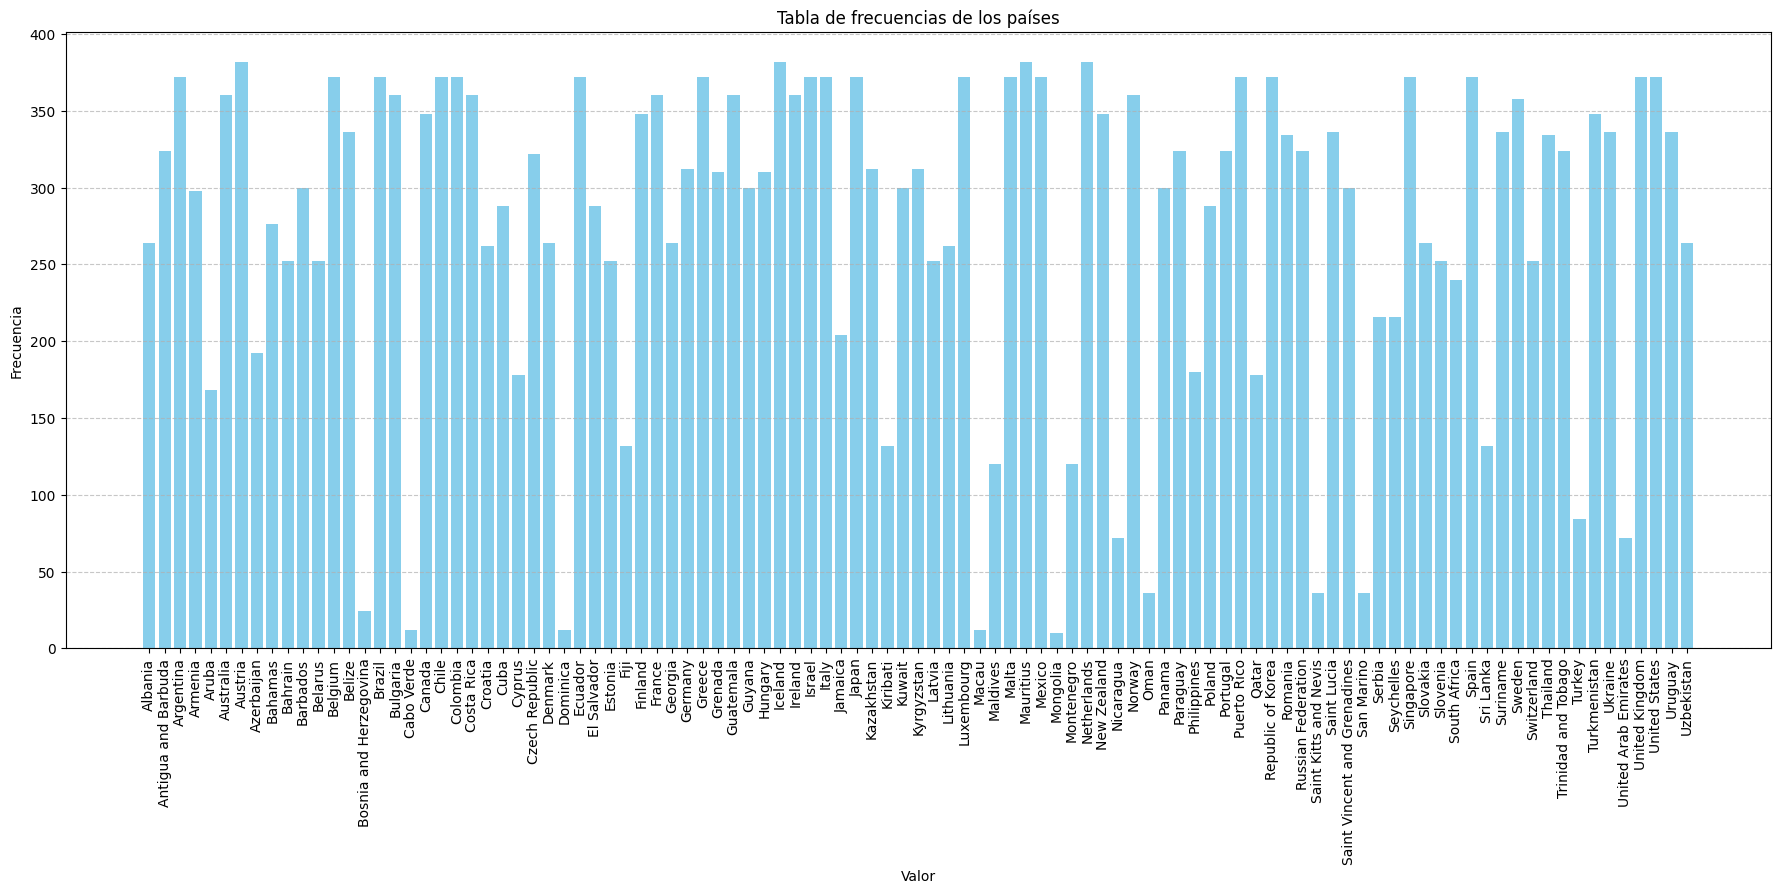

In [51]:
pais = df["country"]
tabla = pais.value_counts().reset_index()
tabla.columns = ["Valor", "Frecuencia"]
tabla = tabla.sort_values(by="Valor")
tabla = tabla.reset_index(drop=True)
plt.figure(figsize=(22, 8))
plt.bar(tabla["Valor"], tabla["Frecuencia"], color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Tabla de frecuencias de los países')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
df.drop('country', axis=1, inplace=True)

### c) Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado

### d) Haga gráficos exploratorios que le dé ideas del estado de los datos

# Guardando el nuevo CSV

In [53]:
# Guardar el nuevo df
df.to_csv('datosLimpios.csv', index=False)

In [54]:
# leer el nuevo csv
newDF = pd.read_csv('datosLimpios.csv')
newDF.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### e) Haga un agrupamiento (clustering) e interprete los resultados

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [19]:
# Escalamos las variables
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.68361541, -0.24563927, -0.39161747, ..., -0.11641692,
        -0.11056805, -0.09787998],
       [-1.68361541, -0.25118231, -0.39287011, ..., -0.11641692,
        -0.11056805, -0.09787998],
       [-1.68361541, -0.25339953, -0.39754838, ..., -0.11641692,
        -0.11056805, -0.09787998],
       ...,
       [ 1.50451895, -0.20240354,  0.23451753, ..., -0.11641692,
        -0.11056805, 10.21659375],
       [ 1.50451895, -0.22014127,  0.20114133, ..., -0.11641692,
        -0.11056805, 10.21659375],
       [ 1.50451895, -0.24563927, -0.1037548 , ..., -0.11641692,
        -0.11056805, 10.21659375]])

In [20]:
# Seleccionamos numero de clusters: 10
k = 10

In [21]:
# Aplicación de kmeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=10, random_state=42)

In [22]:
df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

cluster
0    19680
6     4626
8     1246
4      924
2      636
5      372
3      120
7       84
1       84
9       48
Name: count, dtype: int64

In [23]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Puntuación de Silueta Media: {silhouette_avg}")

Puntuación de Silueta Media: 0.725275073635766


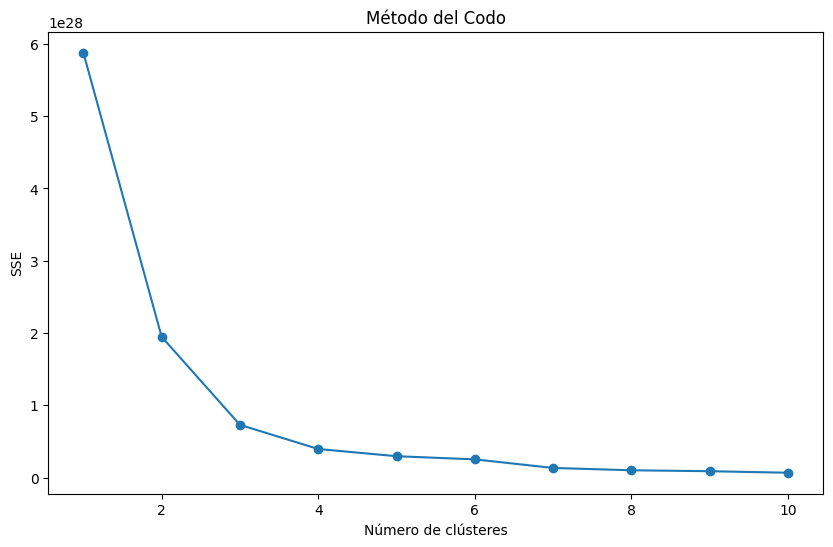

In [24]:
import matplotlib.pyplot as plt

# Calculando la suma de las distancias cuadradas
sse = []
for k in range(1, 11):  # Por ejemplo, probamos con valores de k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # inertia_ es la suma de las distancias cuadradas

# Graficando el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('SSE')
plt.show()

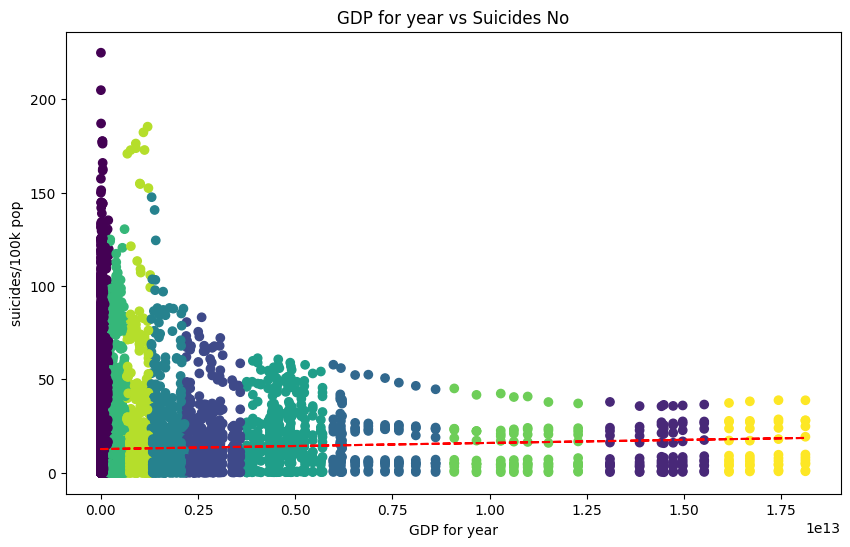

In [25]:
# grafico de puntos en donde y sea suicidios_no y x sea gdp_for_year. Ver todos los clusters
# Establece una linea de tendencia
plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_for_year'], df['suicides/100k pop'], c=df['cluster'], cmap='viridis')

# Establece una linea de tendencia
z = np.polyfit(df['gdp_for_year'], df['suicides/100k pop'], 1)
p = np.poly1d(z)
plt.plot(df['gdp_for_year'], p(df['gdp_for_year']), "r--")

plt.xlabel('GDP for year')
plt.ylabel('suicides/100k pop')
plt.title('GDP for year vs Suicides No')
plt.show()

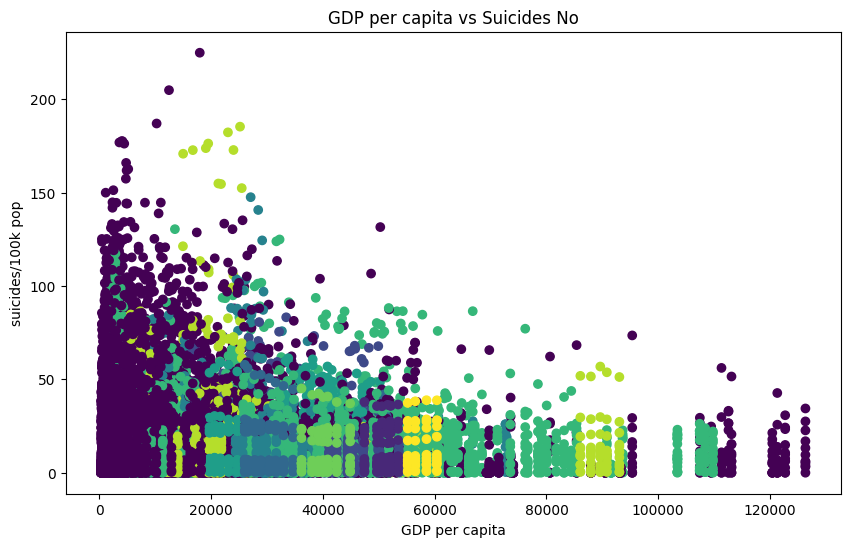

In [26]:
# grafico de puntos en donde y sea suicides_no y x sea gdp_per_capita. Ver todos los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita'], df['suicides/100k pop'], c=df['cluster'], cmap='viridis')
plt.xlabel('GDP per capita')
plt.ylabel('suicides/100k pop')
plt.title('GDP per capita vs Suicides No')
plt.show()

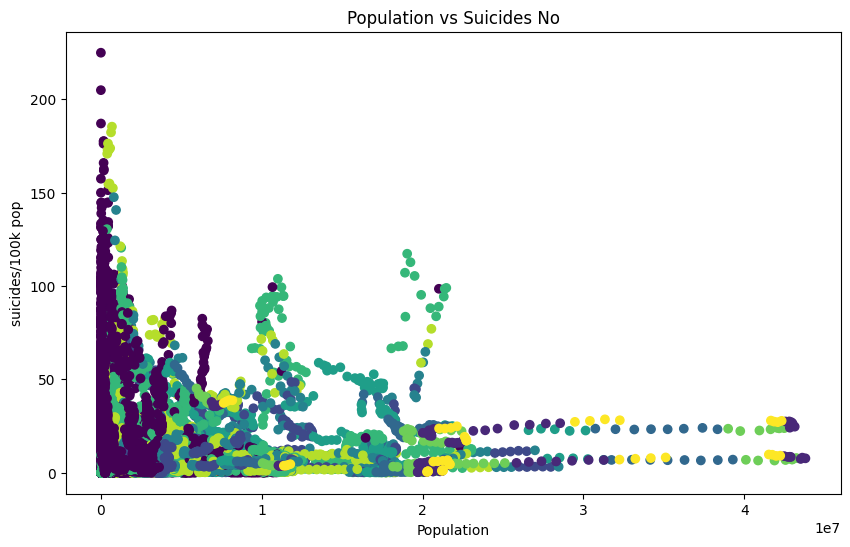

In [27]:
# grafico de puntos en donde y sea suicides_no y x sea population. Ver todos los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['suicides/100k pop'], c=df['cluster'], cmap='viridis')
plt.xlabel('Population')
plt.ylabel('suicides/100k pop')
plt.title('Population vs Suicides No')
plt.show()

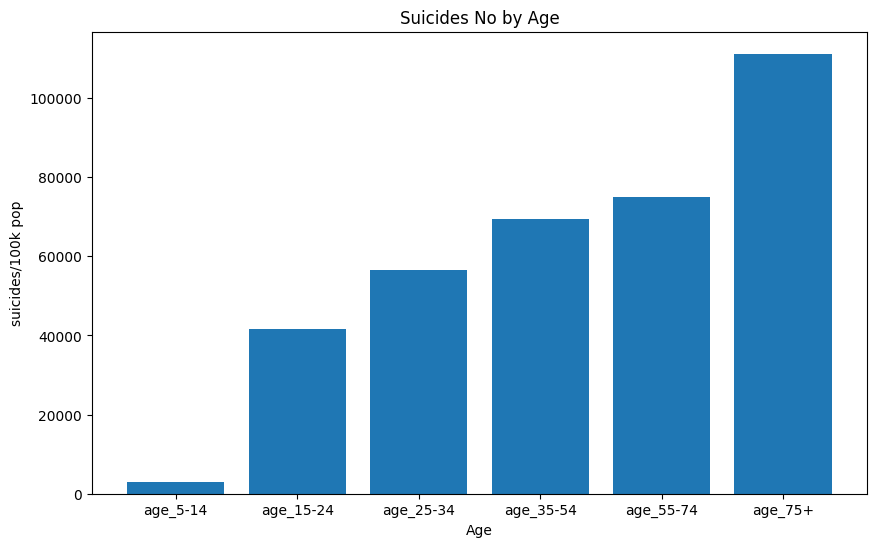

In [28]:
age_columns = [col for col in df.columns if 'age' in col]

# Calcular el número total de suicidios para cada rango de edad
suicides_by_age = df[age_columns].multiply(df['suicides/100k pop'], axis=0).sum()

# ordernar suicides_by_age. de menor a mayor del nombre de las columnas. 
# 5_14, 15_24, 25_34, 35_54, 55_74, 75+ <- orden. 
suicides_by_age = suicides_by_age.reindex(['age_5-14', 'age_15-24', 'age_25-34', 'age_35-54', 'age_55-74', 'age_75+'])

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suicides_by_age.index, suicides_by_age.values)
plt.xlabel('Age')
plt.ylabel('suicides/100k pop')
plt.title('Suicides No by Age')
plt.show()

In [29]:
list_columns2 = list(df.columns)
print(list_columns2)

['year', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14', 'age_55-74', 'age_75+', 'generation_Boomers', 'generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent', 'sex_male', 'country_Albania', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Bosnia and Herzegovina', 'country_Brazil', 'country_Bulgaria', 'country_Cabo Verde', 'country_Canada', 'country_Chile', 'country_Colombia', 'country_Costa Rica', 'country_Croatia', 'country_Cuba', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Dominica', 'country_Ecuador', 'country_El Salvador', 'country_Estonia', 'country_Fiji', 'country_Finland', 

## Otros gráficos

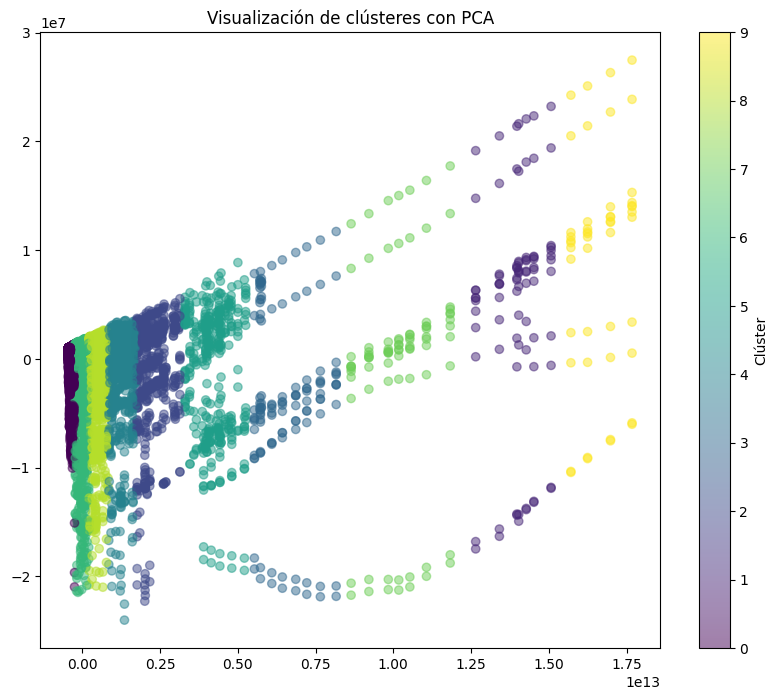

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Realizando PCA para reducir a 2 dimensiones
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)  # Asumiendo que df_scaled ya está estandarizado

# Visualización de los clústeres
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Visualización de clústeres con PCA')
plt.colorbar(label='Clúster')
plt.show()


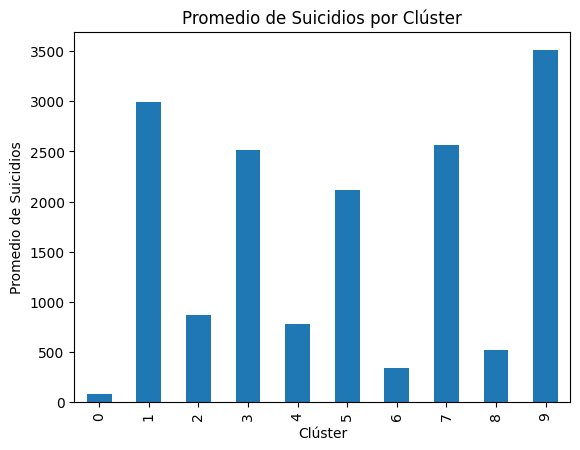

In [31]:
# Calculando las medias para cada clúster
cluster_means = df.groupby('cluster').mean()

# Gráfico de barras para una característica, por ejemplo 'suicides_no'
cluster_means['suicides_no'].plot(kind='bar')
plt.title('Promedio de Suicidios por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Promedio de Suicidios')
plt.show()


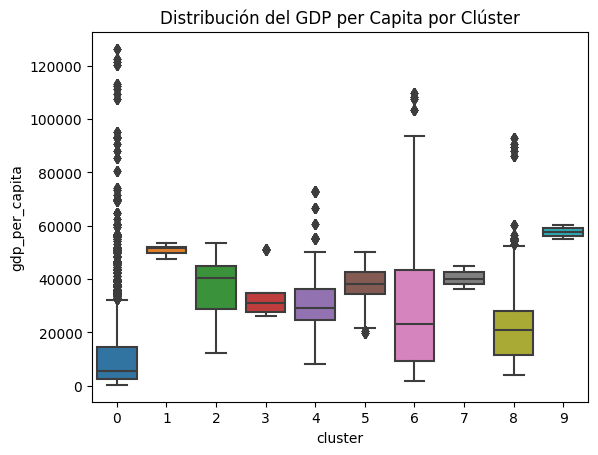

In [32]:
# Boxplot para 'gdp_per_capita' por clúster
import seaborn as sns

sns.boxplot(x='cluster', y='gdp_per_capita', data=df)
plt.title('Distribución del GDP per Capita por Clúster')
plt.show()
